<a href="https://colab.research.google.com/github/d823944/ML100-Days/blob/master/Homework/Day090_color_histogram_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 作業
畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

# Check GPU
import tensorflow as tf
tf.test.gpu_device_name()

Using TensorFlow backend.


'/device:GPU:0'

170500096/170498071 [==============================] - 47s 0us/step


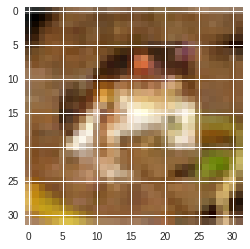

In [2]:
import cv2 # 載入 cv2 套件

train, test = keras.datasets.cifar10.load_data()

image = train[0][0] # 讀取圖片
plt.imshow(image)
plt.show()

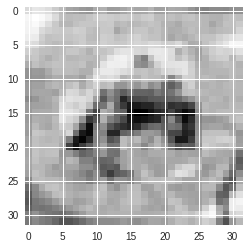

In [3]:
# 把彩色的圖片轉為灰度圖
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.show()

通過調用 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 函數來得到統計後的直方圖值

* imaages (list of array)：要分析的圖片
* channels：產生的直方圖類型。例：[0]→灰度圖，[0, 1, 2]→RGB三色。
* mask：optional，若有提供則僅計算 mask 部份的直方圖。
* histSize：要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
* ranges：像素的範圍，預設為[0,256]，表示<256。

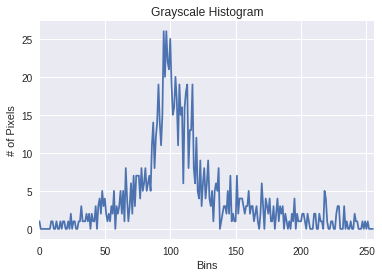

In [4]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [5]:
print("hist shape:", hist.shape, "\n直方圖中前兩個值:", hist[:2]) # 1 表示該灰度圖中，只有 1 個 pixel 的值是 0，0 個 pixel 的值是 1

hist shape: (256, 1) 
直方圖中前兩個值: [[1.]
 [0.]]


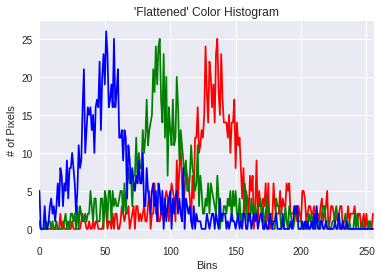

In [6]:
chans = cv2.split(image) # 把圖像的 3 個 channel 切分出來
colors = ("r", "g", "b")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# 對於所有 channel
for (chan, color) in zip(chans, colors):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
 
    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
plt.show()

chans = 3 x 32 x 32
chans[0][0][0] = 59
color = r
There are 685 (66.89%) pixels with color-r in bin-[16, 32]
color = g
There are 220 (21.48%) pixels with color-g in bin-[16, 32]
color = b
There are 88 (8.59%) pixels with color-b in bin-[16, 32]


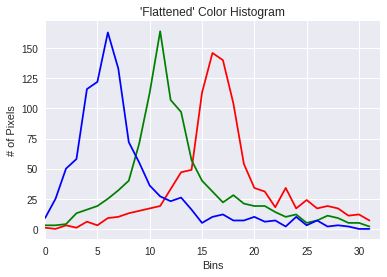

In [24]:
chans = cv2.split(image) # 把圖像的 3 個 channel 切分出來
print(f"chans = {len(chans)} x {len(chans[0])} x {len(chans[0][0])}")
print(f"chans[0][0][0] = {chans[0][0][0]}")
colors = ("r", "g", "b")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# 對於所有 channel
for (chan, color) in zip(chans, colors):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [32], [0, 256])
    print(f"color = {color}")
    print(f"There are {hist[16:].sum():.0f} ({hist[16:].sum() / 1024 * 100:.2f}%) pixels with color-{color} in bin-[16, 32]")
    #print("color-",color, "在 [16, 32] 這個 bin 中有：", hist[1], "個")
    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([0, 32])
plt.show()